In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import utils
import pickle
from collections import defaultdict, OrderedDict
utils.set_pretty_prints()

In [4]:
DATA_FOLDER = './datasets'
DB = 'all_data.pk'
fn = os.path.join(DATA_FOLDER, DB)

In [5]:
import tensorflow as tf
tf.__version__

'2.0.0-beta1'

# Definirea problemei

Vom construi o linie de asamblare (pipeline) de Deep Learning pentru determinarea pretului mediu al unui restaurant in baza unui review scris si postat online.

_Dataset-ul utilizat se bazeaza pe materiale din cursul DS-102 (2019-2020) din cadrul Masterului Facultatii de Automatica si Calculatoare._

In [6]:
with open(fn, 'rb') as file:
    data = pickle.load(file)
type(data)

list

In [7]:
len(data)

200

In [8]:
data[0]

{'price': '202 lei',
 'review': ' \n Noul restaurant vedeta al Bucurestiului, o constructie geniala de marketing \n Maize s-a deschis la inceputul lui noiembrie 2017 in mansarda unui (fel de) bloc cu doua etaje de pe eleganta strada Paris, aproape de Piata Dorobantilor. Poti sa o iei, la fel de bine, si ca pe o casa veche din Bucurestiul vechi, facuta fara imaginatie, sau cu economie la arhitect. Casa e renovata recent, iar zona e atat de frumoasa si de aristocratica, incat orice casa de acolo nu poate sa fie decat frumoasa si ea, indiferent cum ar arata si in ce stare ar fi. \n Daca cei care au construit batrana casa nu au adus arhitecti cu imaginatie, cei care au transformat mansarda in restaurantul Maize au facut-o. Totul arata foarte bine acolo, au pus in valoare fiecare coltisor si detaliu, au reusit sa o umple si de lumina, si au facut loc si bucatariei chiar in mijloc, cu plite si gratare cu tot, dupa cum se vede si in poze, care ma scutesc de mai mult scris. Acolo, sus, au si o

In [13]:
prices = [x['price'] for x in data]
reviews = [x['review'] for x in data]

In [14]:
prices[:10]

['202 lei',
 '176 lei',
 '187 lei',
 '264 lei',
 '187 lei',
 '160 lei',
 '133 lei',
 '182 lei',
 '256 lei',
 '288 lei']

In [15]:
reviews[0]

' \n Noul restaurant vedeta al Bucurestiului, o constructie geniala de marketing \n Maize s-a deschis la inceputul lui noiembrie 2017 in mansarda unui (fel de) bloc cu doua etaje de pe eleganta strada Paris, aproape de Piata Dorobantilor. Poti sa o iei, la fel de bine, si ca pe o casa veche din Bucurestiul vechi, facuta fara imaginatie, sau cu economie la arhitect. Casa e renovata recent, iar zona e atat de frumoasa si de aristocratica, incat orice casa de acolo nu poate sa fie decat frumoasa si ea, indiferent cum ar arata si in ce stare ar fi. \n Daca cei care au construit batrana casa nu au adus arhitecti cu imaginatie, cei care au transformat mansarda in restaurantul Maize au facut-o. Totul arata foarte bine acolo, au pus in valoare fiecare coltisor si detaliu, au reusit sa o umple si de lumina, si au facut loc si bucatariei chiar in mijloc, cu plite si gratare cu tot, dupa cum se vede si in poze, care ma scutesc de mai mult scris. Acolo, sus, au si o mica terasa pe acoperis, foarte

In [16]:
prices[0]

'202 lei'

In [17]:
prices[0].split()

['202', 'lei']

In [18]:
int(prices[0].split()[0])

202

In [19]:
np_prices = np.array([int(x.split()[0]) for x in prices])
np_prices.shape

(200,)

In [21]:
np_prices[:10]

array([202, 176, 187, 264, 187, 160, 133, 182, 256, 288])

In [23]:
text = " as vrea sa tokenizez un text; corpus, etc.etc. sau ce-o fi!"
text.replace(',',' ').replace(';',' ').replace('.',' ').replace('!',' ')

' as vrea sa tokenizez un text  corpus  etc etc  sau ce-o fi '

In [24]:
text.replace(',',' ').replace(';',' ').replace('.',' ').replace('!',' ').split()

['as',
 'vrea',
 'sa',
 'tokenizez',
 'un',
 'text',
 'corpus',
 'etc',
 'etc',
 'sau',
 'ce-o',
 'fi']

In [52]:
def split_text(text):
    return text.replace(',',' ').replace(';',' ').replace('.',' ').replace('!',' ').split()

def gen_vocab(corpus):
    vocab_base = defaultdict(lambda: 0)
    for text in corpus:
        words = split_text(text)
        for word in words:
            vocab_base[word] += 1
    counts = OrderedDict([(w,v) for w,v in sorted(vocab_base.items(), key=lambda x:x[1], reverse=True)])
    vocab = OrderedDict()
    vocab['PAD'] = 0
    for i, word in enumerate(counts):
        vocab[word] = i + 1
    vocab['UNK'] = len(vocab)
    return vocab, counts

vocab, counts = gen_vocab(reviews)

In [38]:
list(counts.items())[:10]

[('de', 7644),
 ('si', 6286),
 ('in', 3914),
 ('la', 3651),
 ('cu', 3275),
 ('mai', 3024),
 ('ca', 2726),
 ('sa', 2665),
 ('din', 2231),
 ('care', 2156)]

In [39]:
list(vocab.items())[:10]

[('PAD', 0),
 ('de', 1),
 ('si', 2),
 ('in', 3),
 ('la', 4),
 ('cu', 5),
 ('mai', 6),
 ('ca', 7),
 ('sa', 8),
 ('din', 9)]

In [40]:
vocab['Bucuresti']

34

In [41]:
counts['Bucuresti']

535

In [43]:
list(counts.items())[-10:]

[('straduiesti', 1),
 ('oribile', 1),
 ('atos', 1),
 ('liceele', 1),
 ('speriati', 1),
 ('inadecvati', 1),
 ('opreasca', 1),
 ('il/o', 1),
 ('regasiti', 1),
 ('luni…', 1)]

In [44]:
list(vocab.items())[-10:]

[('oribile', 16550),
 ('atos', 16551),
 ('liceele', 16552),
 ('speriati', 16553),
 ('inadecvati', 16554),
 ('opreasca', 16555),
 ('il/o', 16556),
 ('regasiti', 16557),
 ('luni…', 16558),
 ('UNK', 16559)]

In [46]:
word_to_id = vocab
id_to_word = {v:k for k,v in word_to_id.items()}

In [47]:
id_to_word[34]

'Bucuresti'

In [48]:
lens = [len(text.split()) for text in reviews]
lens[:10]

[1216, 1113, 1361, 3355, 313, 956, 1425, 576, 830, 463]

(array([ 4., 19., 41., 50., 35.,  7.,  7.,  8.,  5.,  2.,  3.,  1.,  3.,
         3.,  2.,  1.,  0.,  0.,  0.,  1.,  2.,  0.,  2.,  0.,  2.,  0.,
         0.,  0.,  0.,  2.]),
 array([  34.,  205.,  376.,  547.,  718.,  889., 1060., 1231., 1402.,
        1573., 1744., 1915., 2086., 2257., 2428., 2599., 2770., 2941.,
        3112., 3283., 3454., 3625., 3796., 3967., 4138., 4309., 4480.,
        4651., 4822., 4993., 5164.]),
 <a list of 30 Patch objects>)

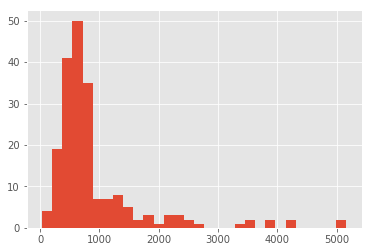

In [50]:
plt.hist(lens, bins=30)

In [54]:
[0] * 5 + [1] * 3

[0, 0, 0, 0, 0, 1, 1, 1]

In [70]:
UNK_WORD_ID = word_to_id['UNK']
UNK_WORD_ID 

16559

In [64]:
def corpus_to_ids(corpus, max_words_per_sent=500):
    lines = []
    for text in corpus:
        words = split_text(text)
        ids = [word_to_id.get(word, UNK_WORD_ID) for word in words]
        ids = ids[:max_words_per_sent]
        if len(ids) < max_words_per_sent:
            ids += [0] * (max_words_per_sent - len(ids))
        lines.append(ids)
    return np.array(lines)

corpus = ['ana are mere si pere precum si bistoflaci si crocobauri']
np_data = corpus_to_ids(corpus, max_words_per_sent=30)
np_data

array([[16559,    71,  3469,     2, 16559,   564,     2, 16559,     2,
        16559,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0]])

In [69]:
np_data.shape

(1, 30)

In [65]:
" ".join([id_to_word[x] for x in np_data[0]])

'UNK are mere si UNK precum si UNK si UNK PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD'

In [67]:
word_to_id.get('mere', UNK_WORD_ID)

3469

In [68]:
id_to_word[3469]

'mere'

In [71]:
counts['mere']

5

In [72]:
np_reviews = corpus_to_ids(reviews)
np_reviews.shape

(200, 500)

In [76]:
np_reviews[:10,:10]

array([[2212,   25, 2213,   42,  143,   16, 1361, 3844,    1, 1618],
       [1736,  172,   15,   13,   30,   32,   70,  324,    4, 1291],
       [5953,   11,  165,  170,    3,  971,  318,  141,    1,    4],
       [ 338,  125, 2981,    7,   32,  752,  286, 1876,   14,  334],
       [9111, 1066,  566, 9112,  159,  981,  238,  409,   67, 2437],
       [  87,  141,   35,    6,   37,   25,    1,   66,    2,  292],
       [1387,    6,   45,   62,  383,  902,    9,   34, 4756,   77],
       [ 405, 3031,    5,   38,    6,   50,  102,    1,   66,    9],
       [ 286,  950,  363,   38,    6,   68,  292,    1,   30, 1878],
       [1918,  152, 1772,   32, 4818, 4819,    2, 6195, 6196, 6197]])

Acum ne dorim ca pentru fiecare din "numerele" ce reprezinta cuvinte sa putem contrui o variabila numerica care sa nu fie considerata ca o simpla variabila continua. Pentru acest lucru este necesara transformarea fiecarei valori de cuvant (de exemplu cuvantul "mere" cu valoarea 3469) intr-un VECTOR.

In [82]:
dim_vect_space = 50
tf_inp = tf.keras.layers.Input((500,), name='propozitie')

tf_x = tf.keras.layers.Embedding(len(word_to_id), dim_vect_space)(tf_inp)

tf_x1 = tf.keras.layers.Conv1D(32, 2)(tf_x)
tf_x1 = tf.keras.layers.Activation('relu')

tf_x2 = tf.keras.layers.Conv1D(32, 3)(tf_x)
tf_x2 = tf.keras.layers.Activation('relu')

tf_x = tf.layers.concatenate([tf_x1, tf_x2])

tf_out = tf.layers.Dense(1)(tf_x)

m = tf.keras.models.Model(tf_inp, tf_out)

word_embeds = m.predict(np_reviews[:3])
word_embeds.shape

(3, 500, 50)

In [83]:
id_to_word[2212]

'Noul'

In [84]:
word_embeds[0][0]

array([ 0.  ,  0.  ,  0.01, -0.04, -0.02, -0.03,  0.02, -0.04,  0.03,
        0.02,  0.01,  0.03, -0.02, -0.02,  0.04, -0.05,  0.02, -0.05,
        0.04,  0.03, -0.05, -0.  , -0.  ,  0.01, -0.01,  0.01, -0.04,
        0.02,  0.01,  0.02,  0.  , -0.05,  0.03,  0.02, -0.01,  0.04,
       -0.04, -0.04,  0.05, -0.02,  0.  ,  0.01, -0.01,  0.02, -0.04,
       -0.  , -0.03,  0.03,  0.02, -0.01], dtype=float32)

In [85]:
np_prices[:10]

array([202, 176, 187, 264, 187, 160, 133, 182, 256, 288])

In [ ]:
m.fit(x,y)

In [ ]:
review = " am fost ...."
ids = ...
m.predict(ids)